### Polynomial Features zur Verarbeitung nicht-linearer Beziehungen (Kapitel 3.5.3)
#### 1) Daten laden und Datumsindex einstellen

In [23]:
import pandas as pd
from math import ceil

pd.set_option('display.max_columns', 20)

data_url=r'https://github.com/tplusone/hanser_ml_zeitreihen/blob/master/Daten/trip_weather_hourly.csv?raw=true'
df = pd.read_csv(data_url)
df['start_date'] = pd.to_datetime(df['start_date'])
df = df.set_index('start_date')
df.head()

,number_trips,duration,max_temperature_f,mean_temperature_f,min_temperature_f,max_dew_point_f,mean_dew_point_f,min_dew_point_f,max_humidity,mean_humidity,...,mean_visibility_miles,min_visibility_miles,max_wind_Speed_mph,mean_wind_speed_mph,max_gust_speed_mph,precipitation_inches,cloud_cover,events,wind_dir_degrees,zip_code
start_date,,,,,,,,,,,,,,,,,,,,,
2013-08-29 09:00:00,12,1022.500000,74.0,68.0,61.0,61.0,58.0,56.0,93.0,75.0,...,10.0,10.0,23.0,11.0,28.0,0,4.0,NaN,286.0,94107
2013-08-29 10:00:00,14,1677.857143,74.0,68.0,61.0,61.0,58.0,56.0,93.0,75.0,...,10.0,10.0,23.0,11.0,28.0,0,4.0,NaN,286.0,94107
2013-08-29 11:00:00,42,2203.809524,74.0,68.0,61.0,61.0,58.0,56.0,93.0,75.0,...,10.0,10.0,23.0,11.0,28.0,0,4.0,NaN,286.0,94107
2013-08-29 12:00:00,120,934.833333,74.0,68.0,61.0,61.0,58.0,56.0,93.0,75.0,...,10.0,10.0,23.0,11.0,28.0,0,4.0,NaN,286.0,94107
2013-08-29 13:00:00,87,3934.103448,74.0,68.0,61.0,61.0,58.0,56.0,93.0,75.0,...,10.0,10.0,23.0,11.0,28.0,0,4.0,NaN,286.0,94107


#### 2) Features aus Datum extrahieren

In [24]:
df['weekday'] = df.index.weekday
df['month'] = df.index.month
df['hour'] = df.index.hour
df[['weekday', 'month', 'hour']].head()

,weekday,month,hour
start_date,,,
2013-08-29 09:00:00,3,8,9
2013-08-29 10:00:00,3,8,10
2013-08-29 11:00:00,3,8,11
2013-08-29 12:00:00,3,8,12
2013-08-29 13:00:00,3,8,13


#### 2) Train-Test-Split durchführen

In [25]:
from sklearn.model_selection import train_test_split

X = df[['month', 'weekday', 'hour']]
y = df['number_trips']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, 
                                            random_state=11)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((14066, 3), (3517, 3), (14066,), (3517,))

#### 3) Polynomial Features verwenden
- Quadrierte Fassung der Monatsvariable produzieren

In [19]:
from sklearn.preprocessing import PolynomialFeatures

X_train_month = X_train[['month']]
X_test_month = X_test[['month']]
poly = PolynomialFeatures(degree=2, include_bias=False)
#y = a*x^2+b*x+c
poly.fit(X_train_month)
X_train_poly = poly.transform(X_train_month)
X_test_poly = poly.transform(X_test_month)
X_train_poly[:5]

array([[  4.,  16.],
       [  1.,   1.],
       [  5.,  25.],
       [  1.,   1.],
       [ 10., 100.]])

#### 4) Regression anlernen
- Mit Polynomial Features

In [26]:
from sklearn.linear_model import LinearRegression

linear_poly = LinearRegression()
#y = c1*m+c2*m^2+d
linear_poly.fit(X_train_poly, y_train)
r2 = linear_poly.score(X_test_poly, y_test)
print('r2 {:.3f}'.format(r2))

r2 0.007


- Mit Original-Monatsvariable (zum Vergleich)

In [21]:
from sklearn.linear_model import LinearRegression

linear = LinearRegression()
linear.fit(X_train_month, y_train)
r2 = linear.score(X_test_month, y_test)
print('r2 {:.3f}'.format(r2))

r2 0.000


- Darstellung der Ergebnisse

D:\Lehre\Zeitreihen_Analyse_und_Prädiktion\Code\venv\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
D:\Lehre\Zeitreihen_Analyse_und_Prädiktion\Code\venv\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\TorstenSchmidt\AppData\Local\Temp\ipykernel_380\1064140215.py:16: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.lineplot(data=df, x='month', y='number_trips', color='black',


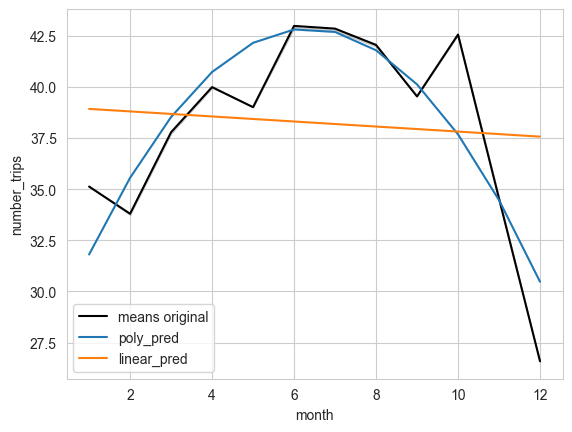

In [22]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Erzeugung von x-Werten für die Schätzung
X_pred_ax = np.arange(1,13, 1).reshape(-1, 1)

# Polynomiale Transformation der x-Werte
X_pred_ax_poly = poly.transform(X_pred_ax)

# Erzeugung von Schätzwerten mit dem polynomialen und einfachen Modell
y_pred_ax_poly = linear_poly.predict(X_pred_ax_poly)
y_pred_ax = linear.predict(X_pred_ax)

# Darstellung der Ergebnisse
sns.lineplot(data=df, x='month', y='number_trips', color='black', 
                ci=False, label='means original')
plt.plot(X_pred_ax, y_pred_ax_poly, label='poly_pred')
plt.plot(X_pred_ax, y_pred_ax, label='linear_pred')
plt.legend()